In [1]:

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
from keras.utils.vis_utils import plot_model
import seaborn as sns
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
df=pd.read_csv('Clean.csv')

Using TensorFlow backend.


In [2]:
df.head()

,GDP,HOUS_SAV,GDP_ID,TAX_REV,TAX_INC,SOC_CON,POP_TER,COST_STARTUP,ADJ_NET_INC,TEA,TEAF
0,41723.84483,1.500000,1.200000,34.401,7.617,11.643,44.250000,3.9,23216.4,6.15,0.94
1,40542.18459,1.517564,1.243228,34.401,7.617,11.643,44.259609,4.0,23216.4,6.39,0.89
2,39626.84667,1.150234,1.210406,33.683,7.343,11.455,42.644691,4.3,23216.4,6.19,0.82
3,37309.86592,2.827930,1.190476,33.290,7.109,11.284,40.980919,4.3,22018.8,5.23,0.81
4,34938.58146,3.032658,1.222357,33.627,7.181,11.270,40.959778,4.4,21307.2,5.70,0.79


In [3]:
dataset = df.values
X = dataset[:,0:9]

In [4]:
X

array([[4.17238448e+04, 1.50000000e+00, 1.20000000e+00, ...,
        4.42500000e+01, 3.90000000e+00, 2.32164000e+04],
       [4.05421846e+04, 1.51756392e+00, 1.24322800e+00, ...,
        4.42596090e+01, 4.00000000e+00, 2.32164000e+04],
       [3.96268467e+04, 1.15023443e+00, 1.21040627e+00, ...,
        4.26446910e+01, 4.30000000e+00, 2.32164000e+04],
       ...,
       [3.40290852e+04, 3.61886358e+00, 3.38082831e+00, ...,
        3.72864530e+01, 7.00000000e-01, 3.69751934e+04],
       [3.36090013e+04, 4.28163457e+00, 3.38319459e+00, ...,
        4.23021970e+01, 7.00000000e-01, 3.61153593e+04],
       [3.15836386e+04, 5.56639054e+00, 3.60175642e+00, ...,
        4.04385340e+01, 7.00000000e-01, 3.17956718e+04]])

In [5]:
Y = dataset[:,9]

In [6]:
Y

array([ 6.15,  6.39,  6.19,  5.23,  5.7 ,  5.47,  5.21,  5.7 ,  5.81,
        4.31,  5.1 ,  7.03,  7.62,  7.27,  5.65,  5.15,  6.65,  4.59,
        6.32,  2.79,  4.18,  4.28,  4.42,  4.87,  4.42,  3.43,  4.32,
        2.35,  2.35,  3.72,  4.62,  5.01,  3.47,  4.94,  4.32,  3.11,
        5.74,  9.11, 12.89,  8.15,  8.15,  8.15,  9.49,  9.97,  8.25,
        7.67,  7.54,  4.4 ,  8.78,  8.78,  8.78,  3.85,  3.85,  3.85,
        6.61,  6.61,  6.61, 12.41,  9.64,  8.93, 10.88,  9.33,  6.53,
        9.25,  6.15,  7.25,  6.76,  7.59,  7.59,  8.22,  7.35,  9.83,
        7.7 ,  8.1 ,  9.14, 11.37,  7.63,  4.97,  5.28,  4.56,  4.7 ,
        5.27,  4.98,  5.34,  5.62,  4.17,  4.1 ,  3.77,  4.21,  4.21,
        5.09,  4.4 ,  5.22,  5.16,  6.28,  6.13,  6.13,  3.92,  5.32,
        5.34,  5.34,  4.57,  5.17,  5.73,  5.83,  4.35,  5.64,  3.17,
        4.39,  5.35,  6.03,  1.63,  3.13,  5.72, 17.42, 15.59, 13.64,
       12.63, 11.88, 13.81, 12.73, 12.84, 12.34,  7.59,  7.96, 10.76,
        9.61, 10.03,

In [7]:
from sklearn import datasets
from sklearn import preprocessing
data_scaler = preprocessing.MinMaxScaler()
target_scaler = preprocessing.MinMaxScaler()

In [8]:
X_scale = data_scaler.fit_transform(X)
Y_scale = target_scaler.fit_transform(Y.reshape(-1, 1))

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split (X_scale, Y_scale, test_size = 0.3)



#Converting the data to the numpy array as it is expected by our RNN model

X_train=np.array(X_train)

Y_train=np.array(Y_train)    



In [10]:
#Reshaping 

X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))


In [11]:


    

#builiding the model

from keras.models import Sequential

from keras.layers import Dense

from keras.layers import LSTM

from keras.layers import Dropout



#Intialising the model

model=Sequential()



#First layer

model.add(LSTM(units=40, activation='relu', return_sequences=True,input_shape=(X_train.shape[1],1)))

model.add(Dropout(0.2))

#Second layer

model.add(LSTM(units=60, activation='relu', return_sequences=True))

model.add(Dropout(0.2))

#Third layer

model.add(LSTM(units=40, activation='relu', return_sequences=True))

model.add(Dropout(0.2))

#Fourth Layer

model.add(LSTM(units=40, activation='relu', return_sequences=False))

model.add(Dropout(0.2))

#Output Layer

model.add(Dense(1))


model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

#compiling the model
#model.compile(optimizer='adam',loss='mean_squared_error')
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])



# from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
# from eli5.sklearn import PermutationImportance
# estimator = KerasRegressor(build_fn=my_model, nb_epoch=500, batch_size=4, verbose=1)
# nsamples, nx, ny = X_train.shape
# print(nsamples, nx, ny)
# d2_train_dataset = X_train.reshape((nsamples,nx*ny))
# estimator.fit(X_train, Y_train)
# perm = PermutationImportance(estimator, random_state=1).fit(X_train,Y_train)
# eli5.show_weights(perm, feature_names = d2_train_dataset.columns.tolist())





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 9, 40)             6720      
_________________________________________________________________
dropout_1 (Dropout)          (None, 9, 40)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 9, 60)             24240     
_________________________________________________________________
dropout_2 (Dropout)          (None, 9, 60)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 9, 40)             16160     
_________________________________________________________________
dropout_3 (Dropout)          (None, 9, 40)             0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 40)               

In [12]:
#fitting the model on our dataset


# hist=model.fit(X_train,Y_train,epochs=500,batch_size=4)
from keras.callbacks import ModelCheckpoint
from datetime import datetime
import h5py
cur_date_time = datetime.strftime(datetime.now(), '%Y%m%d-%H-%M')
model_weight_name = 'model-(relu)-' + str(cur_date_time) + '-' + 'epoch={epoch:02d}-val_loss={val_loss:.6f}.hdf5'
checkpoint = ModelCheckpoint(model_weight_name, monitor='val_loss', mode='min', save_best_only=True, verbose=1)
#set early stopping monitor so the model stops training when it won't improve anymore
# early_stopping_monitor = EarlyStopping(patience=5)
#train model
H = model.fit(X_train, Y_train, validation_split=0.2, epochs=500, callbacks=[checkpoint], batch_size=4)



Train on 182 samples, validate on 46 samples
Epoch 1/500
182/182 [==============================] - 2s 11ms/step - loss: 0.0508 - accuracy: 0.0000e+00 - val_loss: 0.0160 - val_accuracy: 0.0000e+00

Epoch 00001: val_loss improved from inf to 0.01603, saving model to model-(relu)-20200503-17-12-epoch=01-val_loss=0.016035.hdf5
Epoch 2/500
182/182 [==============================] - 0s 2ms/step - loss: 0.0350 - accuracy: 0.0000e+00 - val_loss: 0.0163 - val_accuracy: 0.0000e+00

Epoch 00002: val_loss did not improve from 0.01603
Epoch 3/500
182/182 [==============================] - 0s 2ms/step - loss: 0.0360 - accuracy: 0.0000e+00 - val_loss: 0.0162 - val_accuracy: 0.0000e+00

Epoch 00003: val_loss did not improve from 0.01603
Epoch 4/500
182/182 [==============================] - 0s 2ms/step - loss: 0.0347 - accuracy: 0.0000e+00 - val_loss: 0.0166 - val_accuracy: 0.0000e+00

Epoch 00004: val_loss did not improve from 0.01603
Epoch 5/500
182/182 [==============================] - 0s 3ms/ste

182/182 [==============================] - 0s 3ms/step - loss: 0.0218 - accuracy: 0.0055 - val_loss: 0.0141 - val_accuracy: 0.0000e+00

Epoch 00037: val_loss improved from 0.01439 to 0.01409, saving model to model-(relu)-20200503-17-12-epoch=37-val_loss=0.014091.hdf5
Epoch 38/500
182/182 [==============================] - 0s 3ms/step - loss: 0.0196 - accuracy: 0.0055 - val_loss: 0.0137 - val_accuracy: 0.0000e+00

Epoch 00038: val_loss improved from 0.01409 to 0.01371, saving model to model-(relu)-20200503-17-12-epoch=38-val_loss=0.013710.hdf5
Epoch 39/500
182/182 [==============================] - 0s 3ms/step - loss: 0.0198 - accuracy: 0.0055 - val_loss: 0.0160 - val_accuracy: 0.0000e+00

Epoch 00039: val_loss did not improve from 0.01371
Epoch 40/500
182/182 [==============================] - 0s 3ms/step - loss: 0.0208 - accuracy: 0.0000e+00 - val_loss: 0.0161 - val_accuracy: 0.0000e+00

Epoch 00040: val_loss did not improve from 0.01371
Epoch 41/500
182/182 [=========================

182/182 [==============================] - 0s 2ms/step - loss: 0.0199 - accuracy: 0.0000e+00 - val_loss: 0.0129 - val_accuracy: 0.0000e+00

Epoch 00075: val_loss did not improve from 0.01244
Epoch 76/500
182/182 [==============================] - 0s 2ms/step - loss: 0.0177 - accuracy: 0.0055 - val_loss: 0.0127 - val_accuracy: 0.0000e+00

Epoch 00076: val_loss did not improve from 0.01244
Epoch 77/500
182/182 [==============================] - 0s 3ms/step - loss: 0.0171 - accuracy: 0.0055 - val_loss: 0.0121 - val_accuracy: 0.0000e+00

Epoch 00077: val_loss improved from 0.01244 to 0.01209, saving model to model-(relu)-20200503-17-12-epoch=77-val_loss=0.012095.hdf5
Epoch 78/500
182/182 [==============================] - 0s 3ms/step - loss: 0.0191 - accuracy: 0.0055 - val_loss: 0.0132 - val_accuracy: 0.0000e+00

Epoch 00078: val_loss did not improve from 0.01209
Epoch 79/500
182/182 [==============================] - 0s 3ms/step - loss: 0.0179 - accuracy: 0.0055 - val_loss: 0.0136 - val_a

182/182 [==============================] - 0s 3ms/step - loss: 0.0146 - accuracy: 0.0055 - val_loss: 0.0119 - val_accuracy: 0.0000e+00

Epoch 00113: val_loss did not improve from 0.01031
Epoch 114/500
182/182 [==============================] - 1s 3ms/step - loss: 0.0147 - accuracy: 0.0055 - val_loss: 0.0106 - val_accuracy: 0.0000e+00

Epoch 00114: val_loss did not improve from 0.01031
Epoch 115/500
182/182 [==============================] - 0s 3ms/step - loss: 0.0136 - accuracy: 0.0055 - val_loss: 0.0125 - val_accuracy: 0.0000e+00

Epoch 00115: val_loss did not improve from 0.01031
Epoch 116/500
182/182 [==============================] - 0s 3ms/step - loss: 0.0157 - accuracy: 0.0055 - val_loss: 0.0104 - val_accuracy: 0.0000e+00

Epoch 00116: val_loss did not improve from 0.01031
Epoch 117/500
182/182 [==============================] - 0s 3ms/step - loss: 0.0147 - accuracy: 0.0055 - val_loss: 0.0113 - val_accuracy: 0.0000e+00

Epoch 00117: val_loss did not improve from 0.01031
Epoch 118


Epoch 00152: val_loss did not improve from 0.00982
Epoch 153/500
182/182 [==============================] - 0s 2ms/step - loss: 0.0134 - accuracy: 0.0055 - val_loss: 0.0110 - val_accuracy: 0.0000e+00

Epoch 00153: val_loss did not improve from 0.00982
Epoch 154/500
182/182 [==============================] - 1s 3ms/step - loss: 0.0134 - accuracy: 0.0055 - val_loss: 0.0099 - val_accuracy: 0.0000e+00

Epoch 00154: val_loss did not improve from 0.00982
Epoch 155/500
182/182 [==============================] - 1s 3ms/step - loss: 0.0153 - accuracy: 0.0055 - val_loss: 0.0103 - val_accuracy: 0.0000e+00

Epoch 00155: val_loss did not improve from 0.00982
Epoch 156/500
182/182 [==============================] - 0s 3ms/step - loss: 0.0129 - accuracy: 0.0055 - val_loss: 0.0109 - val_accuracy: 0.0000e+00

Epoch 00156: val_loss did not improve from 0.00982
Epoch 157/500
182/182 [==============================] - 0s 2ms/step - loss: 0.0117 - accuracy: 0.0055 - val_loss: 0.0106 - val_accuracy: 0.0000

182/182 [==============================] - 1s 3ms/step - loss: 0.0123 - accuracy: 0.0055 - val_loss: 0.0124 - val_accuracy: 0.0000e+00

Epoch 00192: val_loss did not improve from 0.00870
Epoch 193/500
182/182 [==============================] - 0s 3ms/step - loss: 0.0130 - accuracy: 0.0055 - val_loss: 0.0089 - val_accuracy: 0.0000e+00

Epoch 00193: val_loss did not improve from 0.00870
Epoch 194/500
182/182 [==============================] - 0s 3ms/step - loss: 0.0133 - accuracy: 0.0055 - val_loss: 0.0089 - val_accuracy: 0.0000e+00

Epoch 00194: val_loss did not improve from 0.00870
Epoch 195/500
182/182 [==============================] - 0s 3ms/step - loss: 0.0123 - accuracy: 0.0055 - val_loss: 0.0097 - val_accuracy: 0.0000e+00

Epoch 00195: val_loss did not improve from 0.00870
Epoch 196/500
182/182 [==============================] - 0s 3ms/step - loss: 0.0127 - accuracy: 0.0055 - val_loss: 0.0121 - val_accuracy: 0.0000e+00

Epoch 00196: val_loss did not improve from 0.00870
Epoch 197

182/182 [==============================] - 0s 3ms/step - loss: 0.0136 - accuracy: 0.0055 - val_loss: 0.0132 - val_accuracy: 0.0000e+00

Epoch 00232: val_loss did not improve from 0.00860
Epoch 233/500
182/182 [==============================] - 0s 3ms/step - loss: 0.0130 - accuracy: 0.0055 - val_loss: 0.0097 - val_accuracy: 0.0000e+00

Epoch 00233: val_loss did not improve from 0.00860
Epoch 234/500
182/182 [==============================] - 0s 3ms/step - loss: 0.0116 - accuracy: 0.0055 - val_loss: 0.0099 - val_accuracy: 0.0000e+00

Epoch 00234: val_loss did not improve from 0.00860
Epoch 235/500
182/182 [==============================] - 0s 3ms/step - loss: 0.0129 - accuracy: 0.0055 - val_loss: 0.0110 - val_accuracy: 0.0000e+00

Epoch 00235: val_loss did not improve from 0.00860
Epoch 236/500
182/182 [==============================] - 0s 2ms/step - loss: 0.0129 - accuracy: 0.0055 - val_loss: 0.0100 - val_accuracy: 0.0000e+00

Epoch 00236: val_loss did not improve from 0.00860
Epoch 237

182/182 [==============================] - 0s 2ms/step - loss: 0.0111 - accuracy: 0.0055 - val_loss: 0.0090 - val_accuracy: 0.0000e+00

Epoch 00272: val_loss did not improve from 0.00825
Epoch 273/500
182/182 [==============================] - 0s 2ms/step - loss: 0.0129 - accuracy: 0.0055 - val_loss: 0.0092 - val_accuracy: 0.0000e+00

Epoch 00273: val_loss did not improve from 0.00825
Epoch 274/500
182/182 [==============================] - 0s 2ms/step - loss: 0.0097 - accuracy: 0.0055 - val_loss: 0.0096 - val_accuracy: 0.0000e+00

Epoch 00274: val_loss did not improve from 0.00825
Epoch 275/500
182/182 [==============================] - 0s 2ms/step - loss: 0.0104 - accuracy: 0.0055 - val_loss: 0.0103 - val_accuracy: 0.0000e+00

Epoch 00275: val_loss did not improve from 0.00825
Epoch 276/500
182/182 [==============================] - 0s 2ms/step - loss: 0.0116 - accuracy: 0.0055 - val_loss: 0.0092 - val_accuracy: 0.0000e+00

Epoch 00276: val_loss did not improve from 0.00825
Epoch 277

182/182 [==============================] - 0s 2ms/step - loss: 0.0094 - accuracy: 0.0055 - val_loss: 0.0124 - val_accuracy: 0.0000e+00

Epoch 00312: val_loss did not improve from 0.00804
Epoch 313/500
182/182 [==============================] - 0s 3ms/step - loss: 0.0096 - accuracy: 0.0055 - val_loss: 0.0084 - val_accuracy: 0.0000e+00

Epoch 00313: val_loss did not improve from 0.00804
Epoch 314/500
182/182 [==============================] - 0s 2ms/step - loss: 0.0095 - accuracy: 0.0055 - val_loss: 0.0096 - val_accuracy: 0.0000e+00

Epoch 00314: val_loss did not improve from 0.00804
Epoch 315/500
182/182 [==============================] - 0s 2ms/step - loss: 0.0095 - accuracy: 0.0055 - val_loss: 0.0115 - val_accuracy: 0.0000e+00

Epoch 00315: val_loss did not improve from 0.00804
Epoch 316/500
182/182 [==============================] - 0s 2ms/step - loss: 0.0103 - accuracy: 0.0055 - val_loss: 0.0084 - val_accuracy: 0.0000e+00

Epoch 00316: val_loss did not improve from 0.00804
Epoch 317


Epoch 00351: val_loss did not improve from 0.00699
Epoch 352/500
182/182 [==============================] - 0s 3ms/step - loss: 0.0093 - accuracy: 0.0055 - val_loss: 0.0091 - val_accuracy: 0.0000e+00

Epoch 00352: val_loss did not improve from 0.00699
Epoch 353/500
182/182 [==============================] - 0s 3ms/step - loss: 0.0080 - accuracy: 0.0055 - val_loss: 0.0100 - val_accuracy: 0.0000e+00

Epoch 00353: val_loss did not improve from 0.00699
Epoch 354/500
182/182 [==============================] - 1s 3ms/step - loss: 0.0084 - accuracy: 0.0055 - val_loss: 0.0093 - val_accuracy: 0.0000e+00

Epoch 00354: val_loss did not improve from 0.00699
Epoch 355/500
182/182 [==============================] - 1s 3ms/step - loss: 0.0085 - accuracy: 0.0055 - val_loss: 0.0088 - val_accuracy: 0.0000e+00

Epoch 00355: val_loss did not improve from 0.00699
Epoch 356/500
182/182 [==============================] - 1s 3ms/step - loss: 0.0091 - accuracy: 0.0055 - val_loss: 0.0076 - val_accuracy: 0.0000

182/182 [==============================] - 0s 2ms/step - loss: 0.0081 - accuracy: 0.0055 - val_loss: 0.0071 - val_accuracy: 0.0000e+00

Epoch 00391: val_loss did not improve from 0.00682
Epoch 392/500
182/182 [==============================] - 0s 2ms/step - loss: 0.0079 - accuracy: 0.0055 - val_loss: 0.0087 - val_accuracy: 0.0000e+00

Epoch 00392: val_loss did not improve from 0.00682
Epoch 393/500
182/182 [==============================] - 0s 2ms/step - loss: 0.0095 - accuracy: 0.0055 - val_loss: 0.0095 - val_accuracy: 0.0000e+00

Epoch 00393: val_loss did not improve from 0.00682
Epoch 394/500
182/182 [==============================] - 0s 2ms/step - loss: 0.0079 - accuracy: 0.0055 - val_loss: 0.0088 - val_accuracy: 0.0000e+00

Epoch 00394: val_loss did not improve from 0.00682
Epoch 395/500
182/182 [==============================] - 0s 3ms/step - loss: 0.0076 - accuracy: 0.0055 - val_loss: 0.0078 - val_accuracy: 0.0000e+00

Epoch 00395: val_loss did not improve from 0.00682
Epoch 396


Epoch 00430: val_loss did not improve from 0.00634
Epoch 431/500
182/182 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 0.0055 - val_loss: 0.0064 - val_accuracy: 0.0000e+00

Epoch 00431: val_loss did not improve from 0.00634
Epoch 432/500
182/182 [==============================] - 0s 2ms/step - loss: 0.0078 - accuracy: 0.0055 - val_loss: 0.0063 - val_accuracy: 0.0000e+00

Epoch 00432: val_loss improved from 0.00634 to 0.00625, saving model to model-(relu)-20200503-17-12-epoch=432-val_loss=0.006250.hdf5
Epoch 433/500
182/182 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 0.0055 - val_loss: 0.0070 - val_accuracy: 0.0000e+00

Epoch 00433: val_loss did not improve from 0.00625
Epoch 434/500
182/182 [==============================] - 0s 3ms/step - loss: 0.0091 - accuracy: 0.0055 - val_loss: 0.0071 - val_accuracy: 0.0000e+00

Epoch 00434: val_loss did not improve from 0.00625
Epoch 435/500
182/182 [==============================] - 0s 3m

182/182 [==============================] - 0s 2ms/step - loss: 0.0064 - accuracy: 0.0055 - val_loss: 0.0075 - val_accuracy: 0.0000e+00

Epoch 00469: val_loss did not improve from 0.00536
Epoch 470/500
182/182 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 0.0055 - val_loss: 0.0064 - val_accuracy: 0.0000e+00

Epoch 00470: val_loss did not improve from 0.00536
Epoch 471/500
182/182 [==============================] - 1s 3ms/step - loss: 0.0061 - accuracy: 0.0055 - val_loss: 0.0072 - val_accuracy: 0.0000e+00

Epoch 00471: val_loss did not improve from 0.00536
Epoch 472/500
182/182 [==============================] - 1s 3ms/step - loss: 0.0098 - accuracy: 0.0055 - val_loss: 0.0061 - val_accuracy: 0.0000e+00

Epoch 00472: val_loss did not improve from 0.00536
Epoch 473/500
182/182 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 0.0055 - val_loss: 0.0060 - val_accuracy: 0.0000e+00

Epoch 00473: val_loss did not improve from 0.00536
Epoch 474

In [13]:
#Getting the test values


X_test=np.array(X_test)

X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)



In [14]:
#Making prediction

predictions=model.predict(X_test)

predictions=target_scaler.inverse_transform(predictions)

In [15]:
predictions

array([[ 4.876132 ],
       [ 8.652052 ],
       [ 5.862652 ],
       [ 4.696265 ],
       [ 7.8644915],
       [ 8.336876 ],
       [ 6.7664127],
       [ 7.3114276],
       [ 7.2636256],
       [ 8.607278 ],
       [ 6.1315365],
       [ 8.610952 ],
       [ 5.45192  ],
       [ 7.686591 ],
       [ 5.5748987],
       [ 7.255051 ],
       [ 6.139248 ],
       [ 8.865761 ],
       [ 7.275494 ],
       [ 7.276955 ],
       [ 8.583595 ],
       [ 9.6197605],
       [ 6.0428057],
       [ 8.091113 ],
       [ 4.85242  ],
       [ 5.1850233],
       [ 6.35783  ],
       [ 7.542913 ],
       [ 5.7278957],
       [10.791172 ],
       [ 5.315312 ],
       [ 4.8178205],
       [13.738974 ],
       [ 7.411863 ],
       [ 7.4485173],
       [ 7.896828 ],
       [ 5.305589 ],
       [ 6.572677 ],
       [ 7.2863264],
       [ 9.664619 ],
       [ 5.6234517],
       [ 4.843241 ],
       [ 6.670295 ],
       [ 5.932233 ],
       [ 5.1801057],
       [ 4.740978 ],
       [ 5.2983685],
       [ 5.91

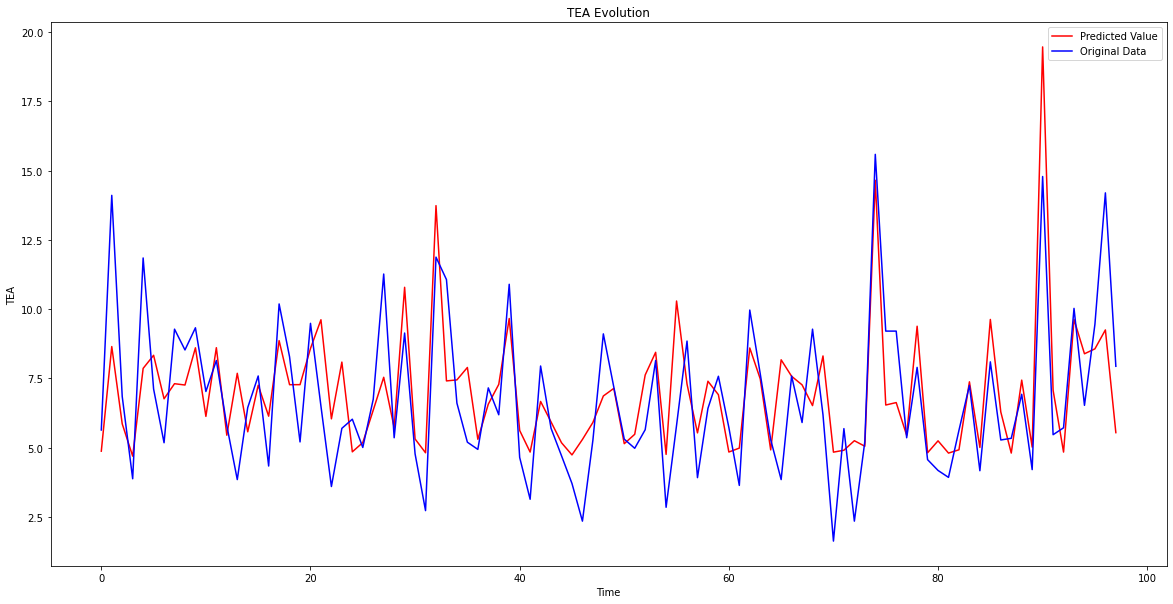

In [16]:
#Visualising the predictions and original data

plt.figure(figsize=(20,10))
plt.plot(predictions,color='red',label='Predicted Value')

plt.plot(target_scaler.inverse_transform(Y_test),color='blue',label='Original Data')

plt.title('TEA Evolution')

plt.xlabel('Time')

plt.ylabel('TEA')

plt.legend()

plt.show()



In [92]:
#Visualising the error between original data and predictions
test_predictions = target_scaler.inverse_transform(Y_test)
error =test_predictions -predictions

In [93]:
error

array([[ 0.76386799],
       [ 5.45794807],
       [ 0.98734818],
       [-0.81626522],
       [ 3.98550854],
       [-1.21687592],
       [-1.58641273],
       [ 1.96857241],
       [ 1.26637438],
       [ 0.72272213],
       [ 0.89846352],
       [-0.46095238],
       [ 0.34807997],
       [-3.83659115],
       [ 0.87510128],
       [ 0.33494886],
       [-1.79924789],
       [ 1.3242392 ],
       [ 1.0045059 ],
       [-2.06695513],
       [ 0.90640472],
       [-3.11976051],
       [-2.44280567],
       [-2.39111309],
       [ 1.17758015],
       [-0.17502331],
       [ 0.39216995],
       [ 3.72708704],
       [-0.36789574],
       [-1.65117203],
       [-0.53531191],
       [-2.08782055],
       [-1.85897362],
       [ 3.65813715],
       [-0.83851732],
       [-2.69682817],
       [-0.3655892 ],
       [ 0.58732286],
       [-1.09632641],
       [ 1.23538055],
       [-0.97345171],
       [-1.70324121],
       [ 1.27970524],
       [-0.23223286],
       [-0.47010569],
       [-1

In [116]:
from sklearn.metrics import mean_squared_error
#print(np.std(X_test, axis=0))
importance_features = []
for i in range(9):  # iterate over the 9 features
    new_x = X_test.copy()
    # generate normal distributed random error by using sigma of each features 
    # we should see std value of each feature by using np.std(X_test, axis=0)[i]
    np.random.seed(42)
    perturbation = np.random.normal(0.0, np.std(X_test, axis=0)[i], size=new_x.shape[0])
    # reshape (98,) to (98,1)
    perturbation = perturbation.reshape(new_x.shape[0], 1)
    # Add noise into each feature
    new_x[:, i, :] = new_x[:, i, :] + perturbation
    # predict model for noisy value
    perturbed_out = model.predict(new_x)
    # invert-transform the predicted value to original value
    # because predicted value is transformed by MinMaxScalar
    perturbed_out1=target_scaler.inverse_transform(perturbed_out)
    # Calcuate MSE
    effect = mean_squared_error(predictions,perturbed_out1)
    importance_features.append((df.columns[i], effect))
    print(f'Variable {i+1}, perturbation effect: {effect:.4f}')


Variable 1, perturbation effect: 2.4386
Variable 2, perturbation effect: 0.6242
Variable 3, perturbation effect: 0.8859
Variable 4, perturbation effect: 2.8967
Variable 5, perturbation effect: 1.0882
Variable 6, perturbation effect: 3.2499
Variable 7, perturbation effect: 1.6501
Variable 8, perturbation effect: 0.6566
Variable 9, perturbation effect: 0.0328


In [127]:
importance_features = sorted(importance_features, key=lambda x: x[1])

permutaion_pd = pd.DataFrame(importance_features, columns=['Feature', 'Importance'])
permutaion_pd

,Feature,Importance
0,ADJ_NET_INC,0.032801
1,HOUS_SAV,0.624158
2,COST_STARTUP,0.656635
3,GDP_ID,0.885893
4,TAX_INC,1.088195
5,POP_TER,1.650135
6,GDP,2.438611
7,TAX_REV,2.896658
8,SOC_CON,3.249865


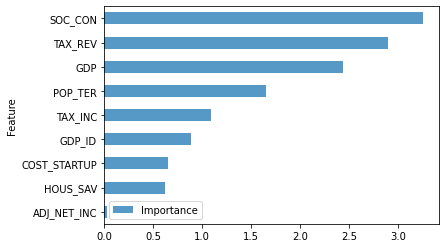

In [130]:
ax = permutaion_pd.plot.barh(x = 'Feature', y = 'Importance', alpha=0.75)